In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzzy
import numpy as np
#Read the dataset
df=pd.read_csv('data.csv')

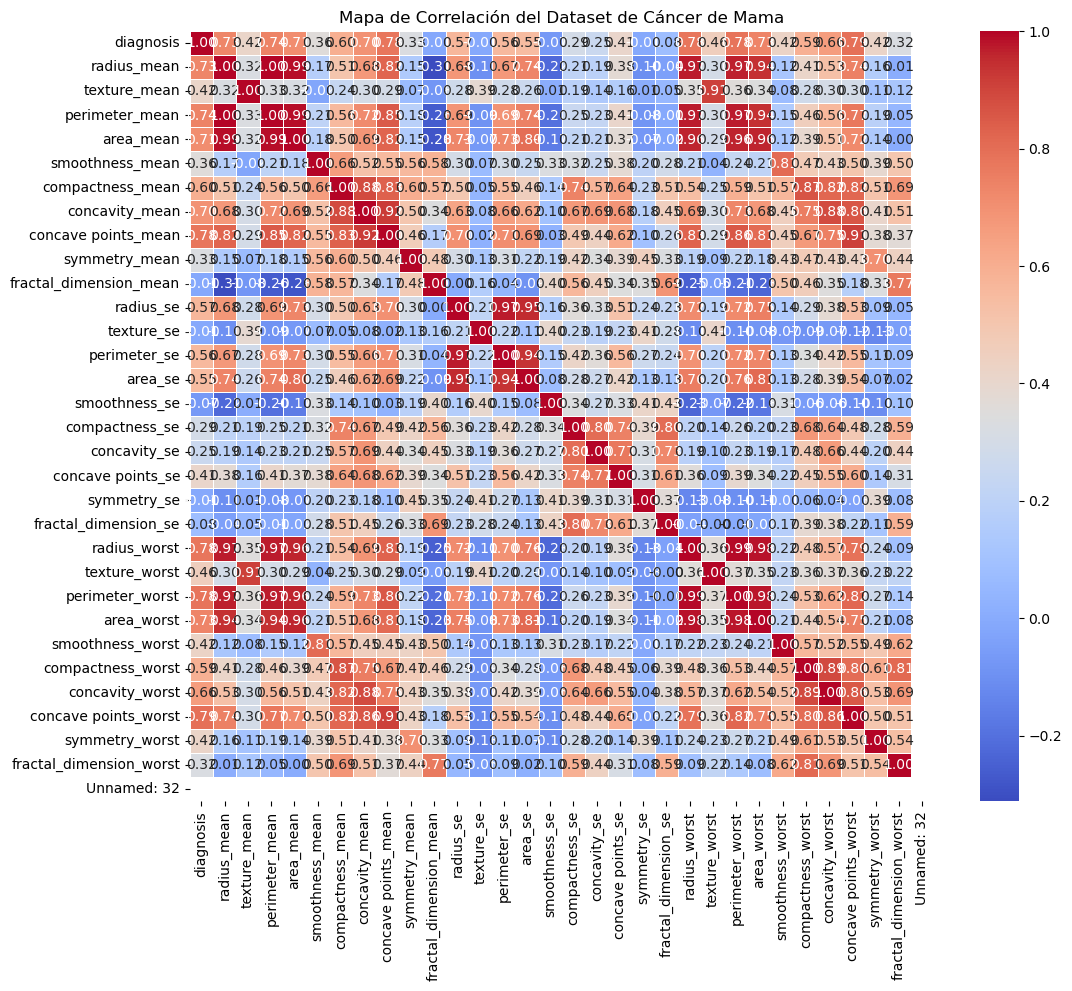

In [2]:
# 1. Eliminar la columna 'id' si está presente (es irrelevante para el análisis)
if 'id' in df.columns:
    df = df.drop(columns=['id'])


# 4. Convertir la columna 'diagnosis' en valores numéricos (si aún no está convertida)
# 'M' (maligno) lo codificamos como 1 y 'B' (benigno) como 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


# Verificar si alguna columna tiene varianza cero (constantes)


# 1. Calcular la matriz de correlación


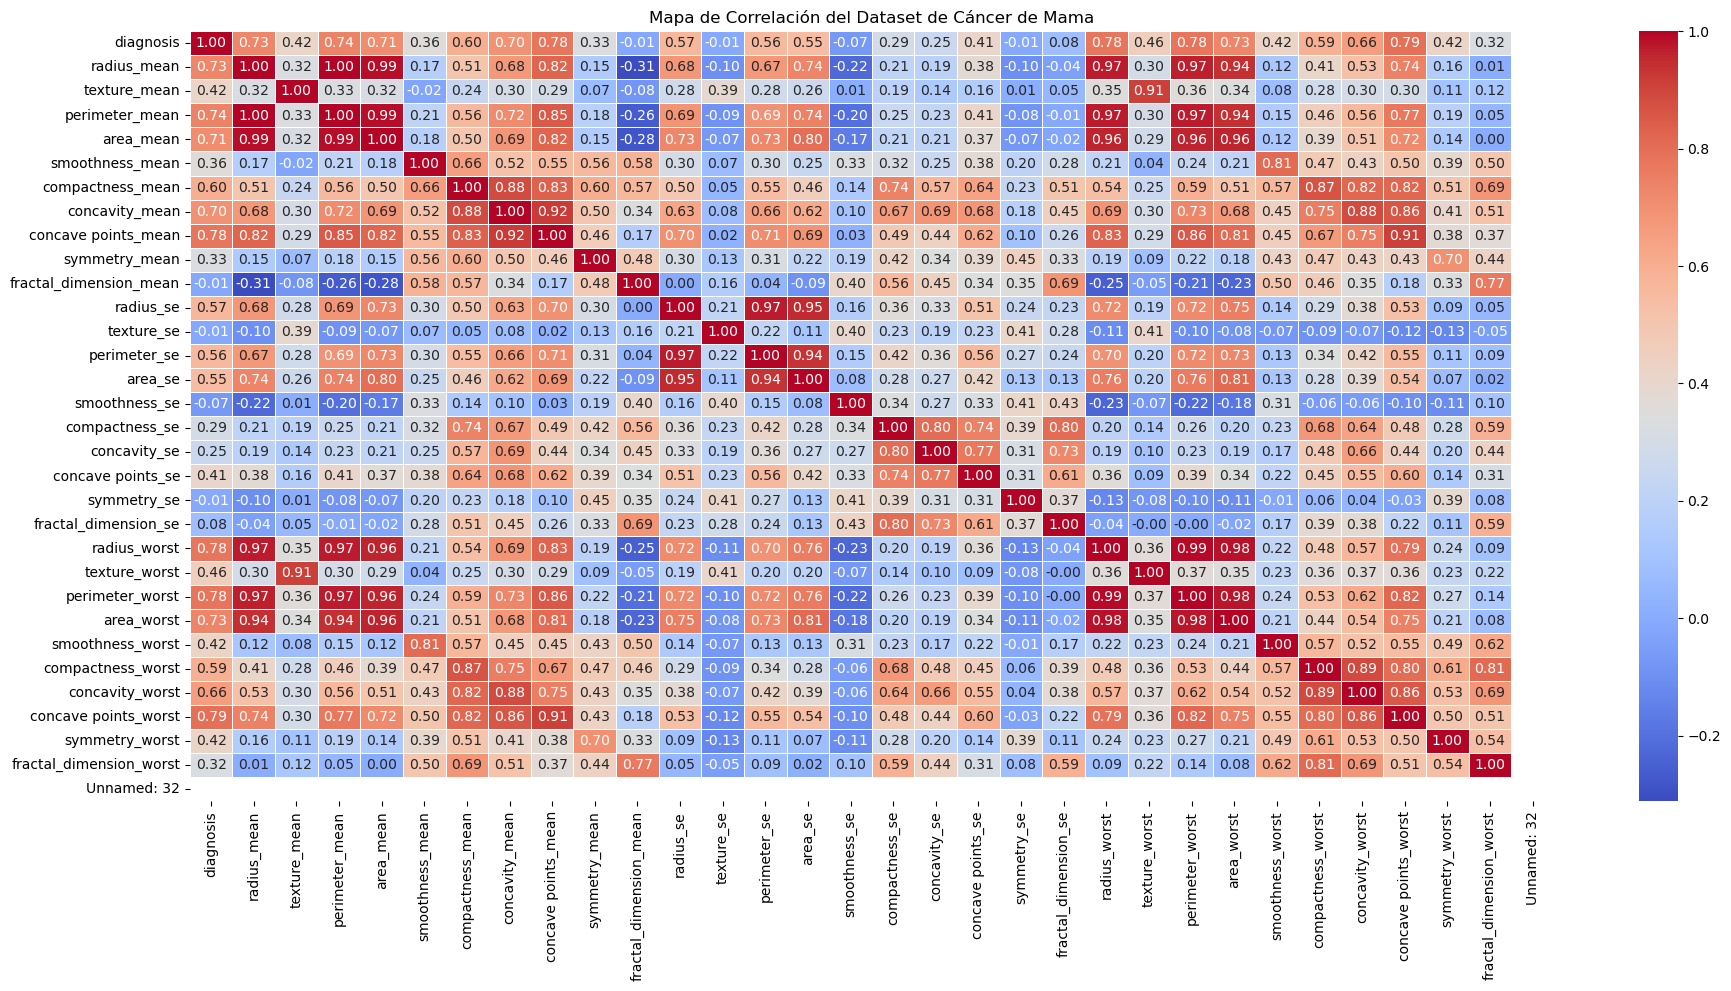

In [4]:
corr_matrix = df.corr()

# 2. Generar el heatmap de correlación
plt.figure(figsize=(22, 10))  # Ajustar el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Mapa de Correlación del Dataset de Cáncer de Mama')
plt.show()
# El dataset ahora está limpio y listo para su análisis

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



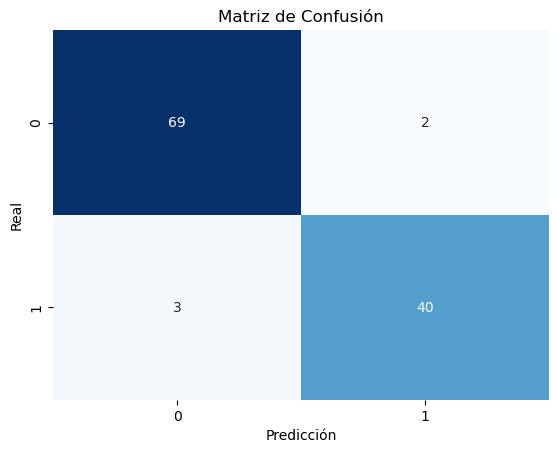

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
            'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']

X = df[features]  # Características seleccionadas
y = df['diagnosis']  # Variable objetivo

# 2. Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar un modelo de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# 5. Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las características que deseas normalizar
features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 
            'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']

# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar las características
df[features] = scaler.fit_transform(df[features])

# Verifica el resultado
print(df[features].head())

   radius_mean  perimeter_mean  area_mean  concavity_mean  \
0     0.521037        0.545989   0.363733        0.703140   
1     0.643144        0.615783   0.501591        0.203608   
2     0.601496        0.595743   0.449417        0.462512   
3     0.210090        0.233501   0.102906        0.565604   
4     0.629893        0.630986   0.489290        0.463918   

   concave points_mean  radius_worst  perimeter_worst  area_worst  \
0             0.731113      0.620776         0.668310    0.450698   
1             0.348757      0.606901         0.539818    0.435214   
2             0.635686      0.556386         0.508442    0.374508   
3             0.522863      0.248310         0.241347    0.094008   
4             0.518390      0.519744         0.506948    0.341575   

   concavity_worst  concave points_worst  
0         0.568610              0.912027  
1         0.192971              0.639175  
2         0.359744              0.835052  
3         0.548642              0.884880  
4  

In [223]:
import numpy as np
import skfuzzy as fuzz

def fuzzy_sets(data_):
    low = fuzz.trimf(data_, [0.00, 0.20, 0.40])
    medium = fuzz.trimf(data_, [0.30, 0.60, 0.70])
    high = fuzz.trimf(data_, [0.50, 0.80, 1.00])
    
    # Crear un diccionario para almacenar los conjuntos difusos
    fuzzy_data = {
        0: low,
        1: medium,
        2: high
    }
    
    return fuzzy_data

In [289]:
fuzzy_results = {}
features_1 = [
            'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']
# Aplicar la función a cada característica y almacenar los resultados
for feature in features:
    fuzzy_results[feature] = fuzzy_sets(df[feature].to_numpy())

# Acceder a los conjuntos difusos
for feature, sets in fuzzy_results.items():
    print(f'Conjuntos difusos para {feature}:')
    print(f'  Bajo: {sets[0]}')
    print(f'  Bajo Medio: {sets[0]}')
    print(f'  Medio: {sets[0]}')
    print(f'  Medio Alto: {sets[0]}')
    print(f'  Alto: {sets[0]}')
    print()  # Línea en blanco para mejor leg

Conjuntos difusos para radius_mean:
  Bajo: [0.         0.         0.         0.94954801 0.         0.70580718
 0.         0.40763879 0.57565431 0.70344077 0.         0.
 0.         0.         0.40290596 0.21122628 0.17809646 0.
 0.         0.44786786 0.55672299 0.59704671 0.02191301 0.
 0.         0.         0.20176061 0.         0.03137867 0.
 0.         0.85015855 0.         0.         0.         0.
 0.27985234 0.56855507 0.10473756 0.46206635 0.47153202 0.93923044
 0.         0.50939467 0.53542524 0.         0.28751952 0.53542524
 0.80046382 0.45969994 0.86908988 0.4242037  0.82649439 0.
 0.07870699 0.92588386 0.         0.17099721 0.56382223 0.38738227
 0.75465001 0.38264944 0.27985234 0.51871835 0.65137962 0.1544323
 0.58781769 0.97557859 0.48464196 0.62771546 0.         0.4512755
 0.         0.38634105 0.73893701 0.         0.45023428 0.
 0.         0.60878414 0.94244877 0.49519618 0.         0.
 0.8122959  0.         0.22542477 0.         0.72710493 0.18756212
 0.19229495 0.014

In [99]:
# the first one is the value, the second one is the fuzzy set

# GA

## Inicializar la poblacion

In [1137]:
def initializePopulation(pop_size):
    return [[int(random.uniform(0,3)) for _ in range(len(features)-5)] for _ in range(pop_size)]
print(initializePopulation(5))

[[0, 2, 2, 0, 1], [1, 2, 1, 0, 2], [0, 0, 2, 0, 1], [2, 0, 1, 1, 0], [1, 1, 0, 2, 0]]


 <!-- evaluar -->

## Evaluation

In [1159]:
def eval(individual):
    id0 = df[df['diagnosis'] == 0].index.tolist()
    id1 = df[df['diagnosis'] == 1].index.tolist()
    bct0, bct1 = [], []

    for i in id0:
        bc0 = 1
        for j in range(len(individual)):
            bc0 *= fuzzy_results[features[j]][individual[j]][i]
        bct0.append(bc0)

    for i in id1:
        bc1 = 1
        for j in range(len(individual)):
            bc1 *= fuzzy_results[features[j]][individual[j]][i]
        bct1.append(bc1)

    Bct = [sum(bct0), sum(bct1)]
    B = (sum(Bct) - max(Bct)) / (len(Bct) - 1)
    CF = (max(Bct) - B) / sum(Bct)
    return CF  # Retorna el fitness del individuo
def evaluatePopulation(population):
    return [{'individual': ind, 'fitness': eval(ind)} for ind in population]
evaluatePopulation(initializePopulation(1000))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_45464\2666582638.py:20: RuntimeWarning: invalid value encountered in scalar divide
  CF = (max(Bct) - B) / sum(Bct)


[{'individual': [1, 2, 2, 2, 1], 'fitness': 1.0},
 {'individual': [0, 0, 1, 2, 0], 'fitness': nan},
 {'individual': [1, 1, 0, 0, 1], 'fitness': 0.8518427221753242},
 {'individual': [1, 2, 1, 1, 0], 'fitness': 1.0},
 {'individual': [1, 2, 1, 2, 2], 'fitness': 1.0},
 {'individual': [0, 0, 2, 0, 1], 'fitness': nan},
 {'individual': [2, 1, 1, 2, 2], 'fitness': 1.0},
 {'individual': [1, 1, 1, 2, 1], 'fitness': 1.0},
 {'individual': [0, 0, 1, 0, 0], 'fitness': nan},
 {'individual': [2, 1, 1, 1, 0], 'fitness': 1.0},
 {'individual': [2, 0, 0, 1, 0], 'fitness': nan},
 {'individual': [2, 0, 0, 0, 0], 'fitness': nan},
 {'individual': [2, 2, 1, 2, 1], 'fitness': 1.0},
 {'individual': [0, 1, 0, 1, 0], 'fitness': 0.6599523155993249},
 {'individual': [1, 0, 1, 0, 2], 'fitness': nan},
 {'individual': [2, 2, 0, 2, 0], 'fitness': nan},
 {'individual': [0, 1, 0, 1, 1], 'fitness': 0.9885339131122077},
 {'individual': [1, 2, 0, 0, 0], 'fitness': 1.0},
 {'individual': [0, 0, 2, 0, 0], 'fitness': nan},
 {'in

## selecton